*Currently running with the "base" conda env, the "flc_local" env is giving me trouble*

## Maritime Incidents Data
* Downloaded from https://www.dco.uscg.mil/Our-Organization/Assistant-Commandant-for-Prevention-Policy-CG-5P/Inspections-Compliance-CG-5PC-/Office-of-Investigations-Casualty-Analysis/Marine-Casualty-and-Pollution-Data-for-Researchers/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import xarray as xr

In [2]:
column_names = [
    "activity_id", "case_id", "datetime", "fk_d_vessel",
    "vessel_id", "vin", "vessel_name", "vessel_service", "vessel_class",
    "vessel_type", "vessel_subtype", "flag_desc", "vessel_activity_role_desc",
    "waterway_name", "event_type", "event_class", "event_subclass",
    "damage_status", "latitude", "longitude"
]

In [3]:
file_path = "../Maritime_Incidents_Data/MISLE_DATA/MisleVslEvents.txt"

In [5]:
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names, encoding='latin-1')

In [6]:
print(df.iloc[16].to_string())

activity_id                                        4616229
case_id                                           639647.0
datetime                       2013-06-08 03:10:00.0000000
fk_d_vessel                                        6354879
vessel_id                                         452354.0
vin                                                MS3999L
vessel_name                                          MYLES
vessel_service                       Passenger (Inspected)
vessel_class                                Passenger Ship
vessel_type                                     Water Taxi
vessel_subtype                       General (More Than 6)
flag_desc                                    UNITED STATES
vessel_activity_role_desc    Involved in a Marine Casualty
waterway_name                          PROVINCETOWN HARBOR
event_type                                        Flooding
event_class                   Progressive - out of control
event_subclass                                         N

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
target_date = '2024-07-11'

filtered_df = df[df['datetime'].dt.date == pd.to_datetime(target_date).date()]


In [9]:
filtered_df

,activity_id,case_id,datetime,fk_d_vessel,vessel_id,vin,vessel_name,vessel_service,vessel_class,vessel_type,vessel_subtype,flag_desc,vessel_activity_role_desc,waterway_name,event_type,event_class,event_subclass,damage_status,latitude,longitude


/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_66492/1063908649.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


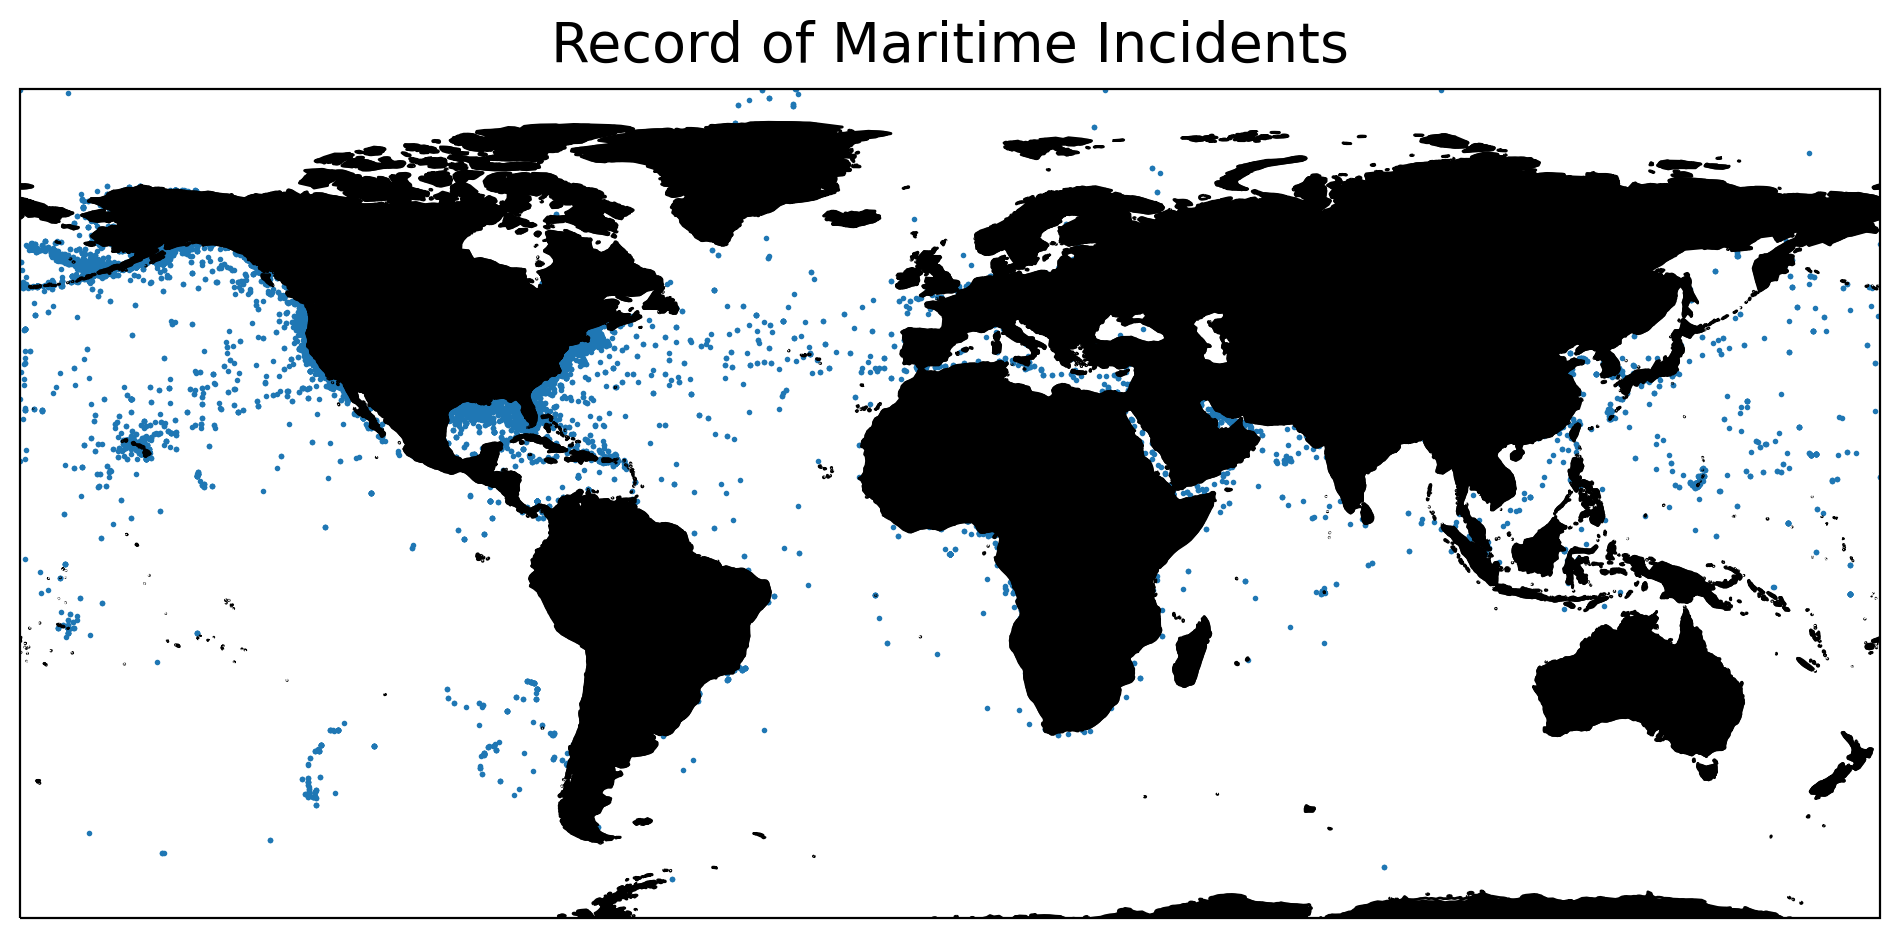

In [10]:
projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

c=ax.scatter(df.longitude, df.latitude, s=1)

ax.set_title("Record of Maritime Incidents", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.LAND, zorder=100, edgecolor='#000', facecolor='#000')

fig.set_dpi(200)
#fig.savefig(location_title, dpi=200, bbox_inches='tight')
fig.show()

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_66492/2849413684.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


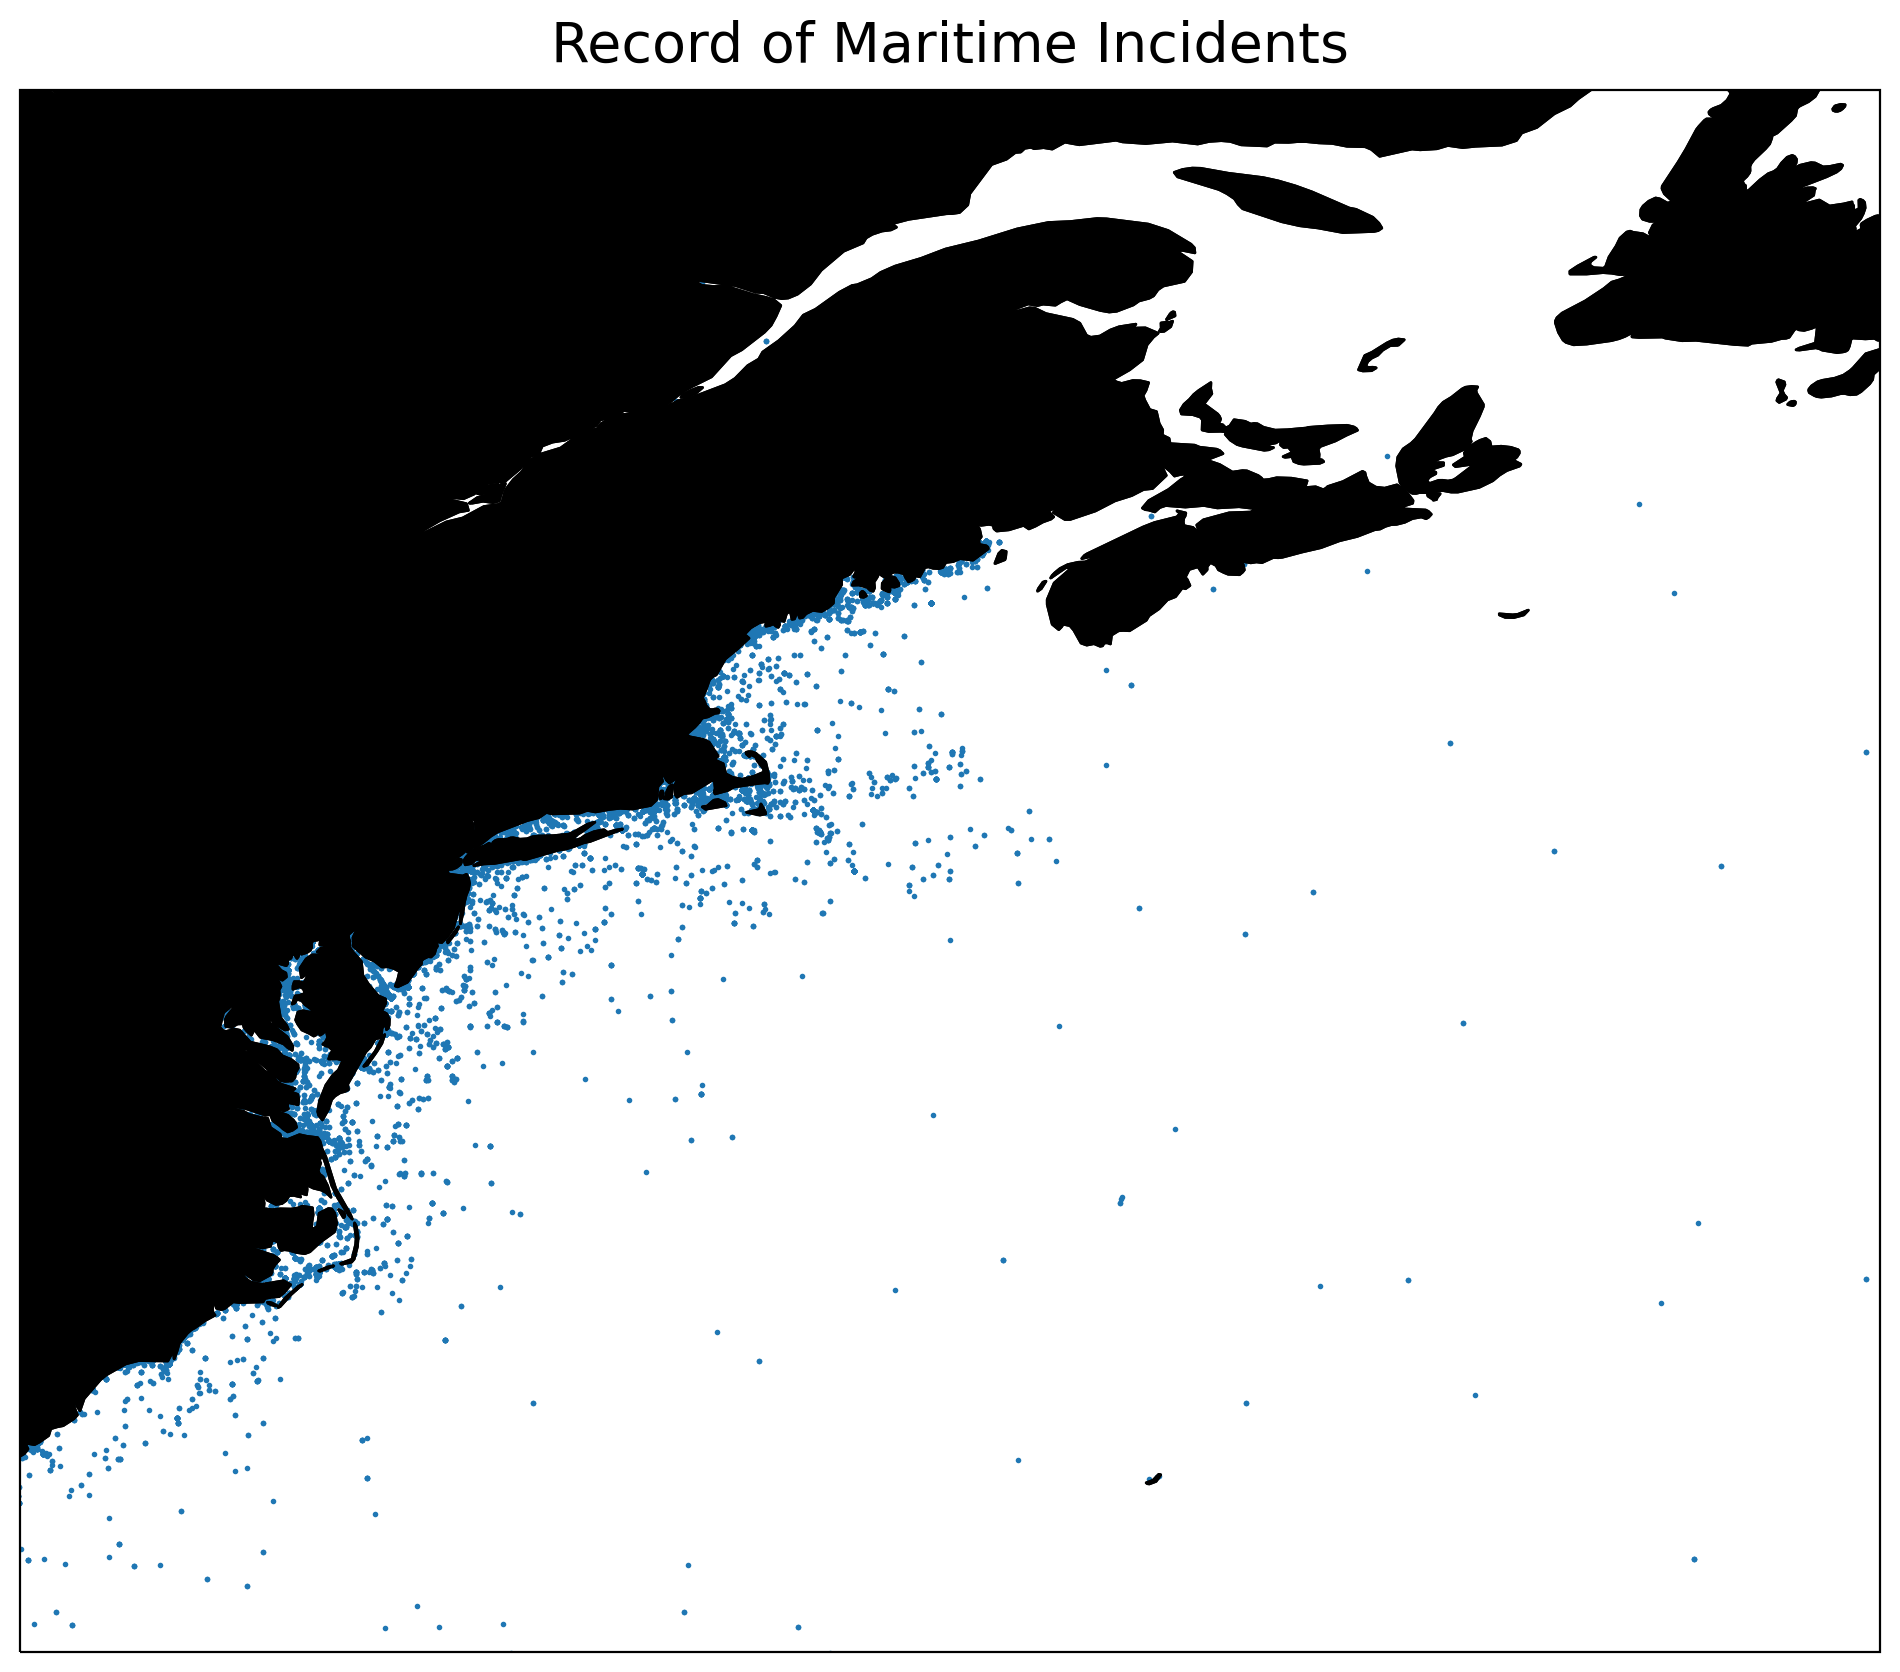

In [11]:
#--- Gulf Stream
latitude_north = 51
latitude_south = 30
longitude_west = -80
longitude_east = -55

projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

c=ax.scatter(df.longitude, df.latitude, s=1)

ax.set_title("Record of Maritime Incidents", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.LAND, zorder=100, edgecolor='#000', facecolor='#000')
ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

fig.set_dpi(200)
#fig.savefig(location_title, dpi=200, bbox_inches='tight')
fig.show()

## ICOADS Data
* Includes ship-measured visibility data
* Downloaded from https://rda.ucar.edu/datasets/d548000/dataaccess/
    * NOAA/NCEI NetCDF data converted from ICOADS R3.0.0/R3.0.2 -> Complete file list -> NetCDF_R3.0.0_2000s -> month wanted

In [12]:
visibility_file_path = "../Maritime_Incidents_Data/ICOADS_R3.0.2_2024-07.nc"

In [13]:
visibility_ds = xr.open_dataset(visibility_file_path)

In [14]:
visibility_ds
visibility_ds = visibility_ds.set_index(obs='time')

In [15]:
visibility_ds.obs

<xarray.DataArray 'obs' (obs: 5372348)>
array(['2024-07-01T00:00:00.000000000', '2024-07-01T00:00:00.000000000',
       '2024-07-01T00:00:00.000000000', ..., '2024-07-31T23:58:47.999988000',
       '2024-07-31T23:58:47.999988000', '2024-07-31T23:58:47.999988000'],
      dtype='datetime64[ns]')
Coordinates:
    lat      (obs) float32 ...
    lon      (obs) float32 ...
  * obs      (obs) datetime64[ns] 2024-07-01 ... 2024-07-31T23:58:47.999988

In [16]:
date = '2024-07-31'

filtered_ds = visibility_ds.sel(obs=slice(date+'T00:00:00', date+'T23:59:59.999999'))

In [17]:
filtered_ds.VV

<xarray.DataArray 'VV' (obs: 175674)>
[175674 values with dtype=float32]
Coordinates:
    lat      (obs) float32 ...
    lon      (obs) float32 ...
  * obs      (obs) datetime64[ns] 2024-07-31 ... 2024-07-31T23:58:47.999988
Attributes:
    standard_name:        visibility_in_air
    long_name:            Visibility
    units:                m
    valid_min:            90
    valid_max:            99
    grid_mapping:         crs
    cell_methods:         time: point
    comment:              WMO Code Table 4377 
    ancillary_variables:  BNC

**The vis values are a code that has to be converted to km (in Miller Time slides)**

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_66492/1739705212.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/jturner/miniconda3/envs/FLC/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


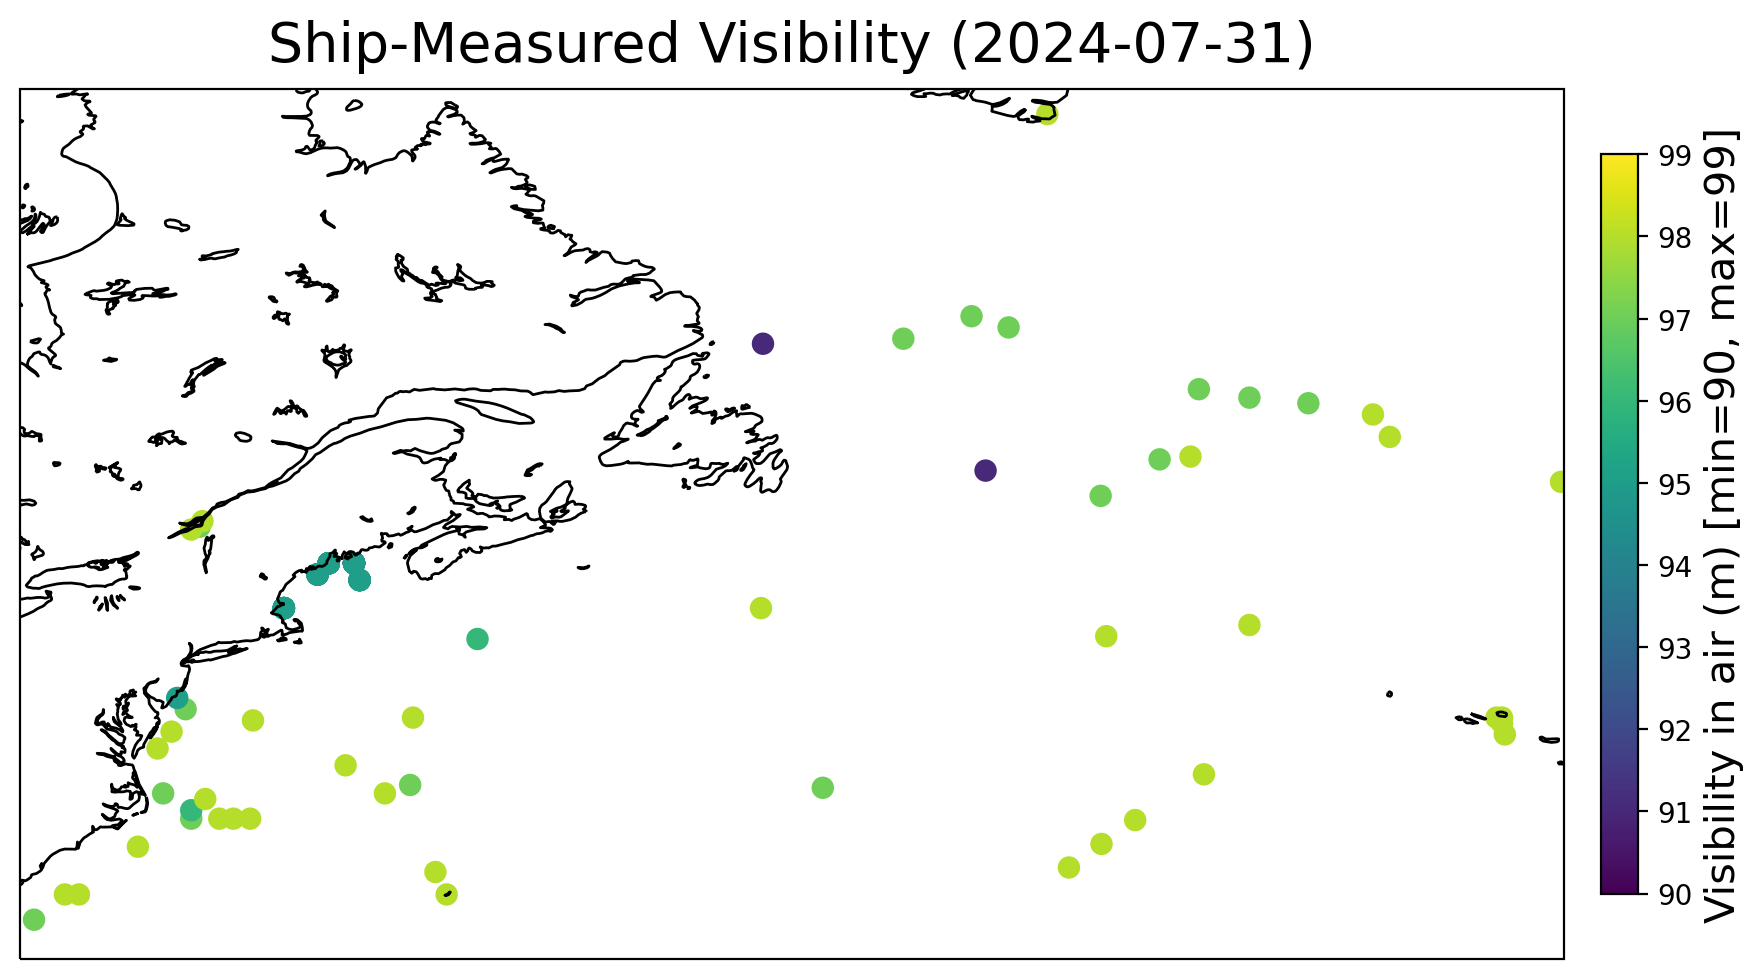

In [18]:
#--- Northern Atlantic
latitude_north = 61
latitude_south = 30
longitude_west = -80
longitude_east = -25

projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

c=ax.scatter(filtered_ds.VV.lon, filtered_ds.VV.lat, c=filtered_ds.VV, s=50)
clb = plt.colorbar(c, shrink=0.4, pad=0.02, ax=ax)
clb.set_label('Visibility in air (m) [min=90, max=99]', fontsize=15)

ax.set_title("Ship-Measured Visibility ("+date+")", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.LAKES, zorder=100, edgecolor='black', facecolor='none')
ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

fig.set_dpi(200)
#fig.savefig(location_title, dpi=200, bbox_inches='tight')
fig.show()

In [19]:
filtered_non_null_ds = filtered_ds.dropna(dim='obs', subset=['VV'])

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_66492/1191204926.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


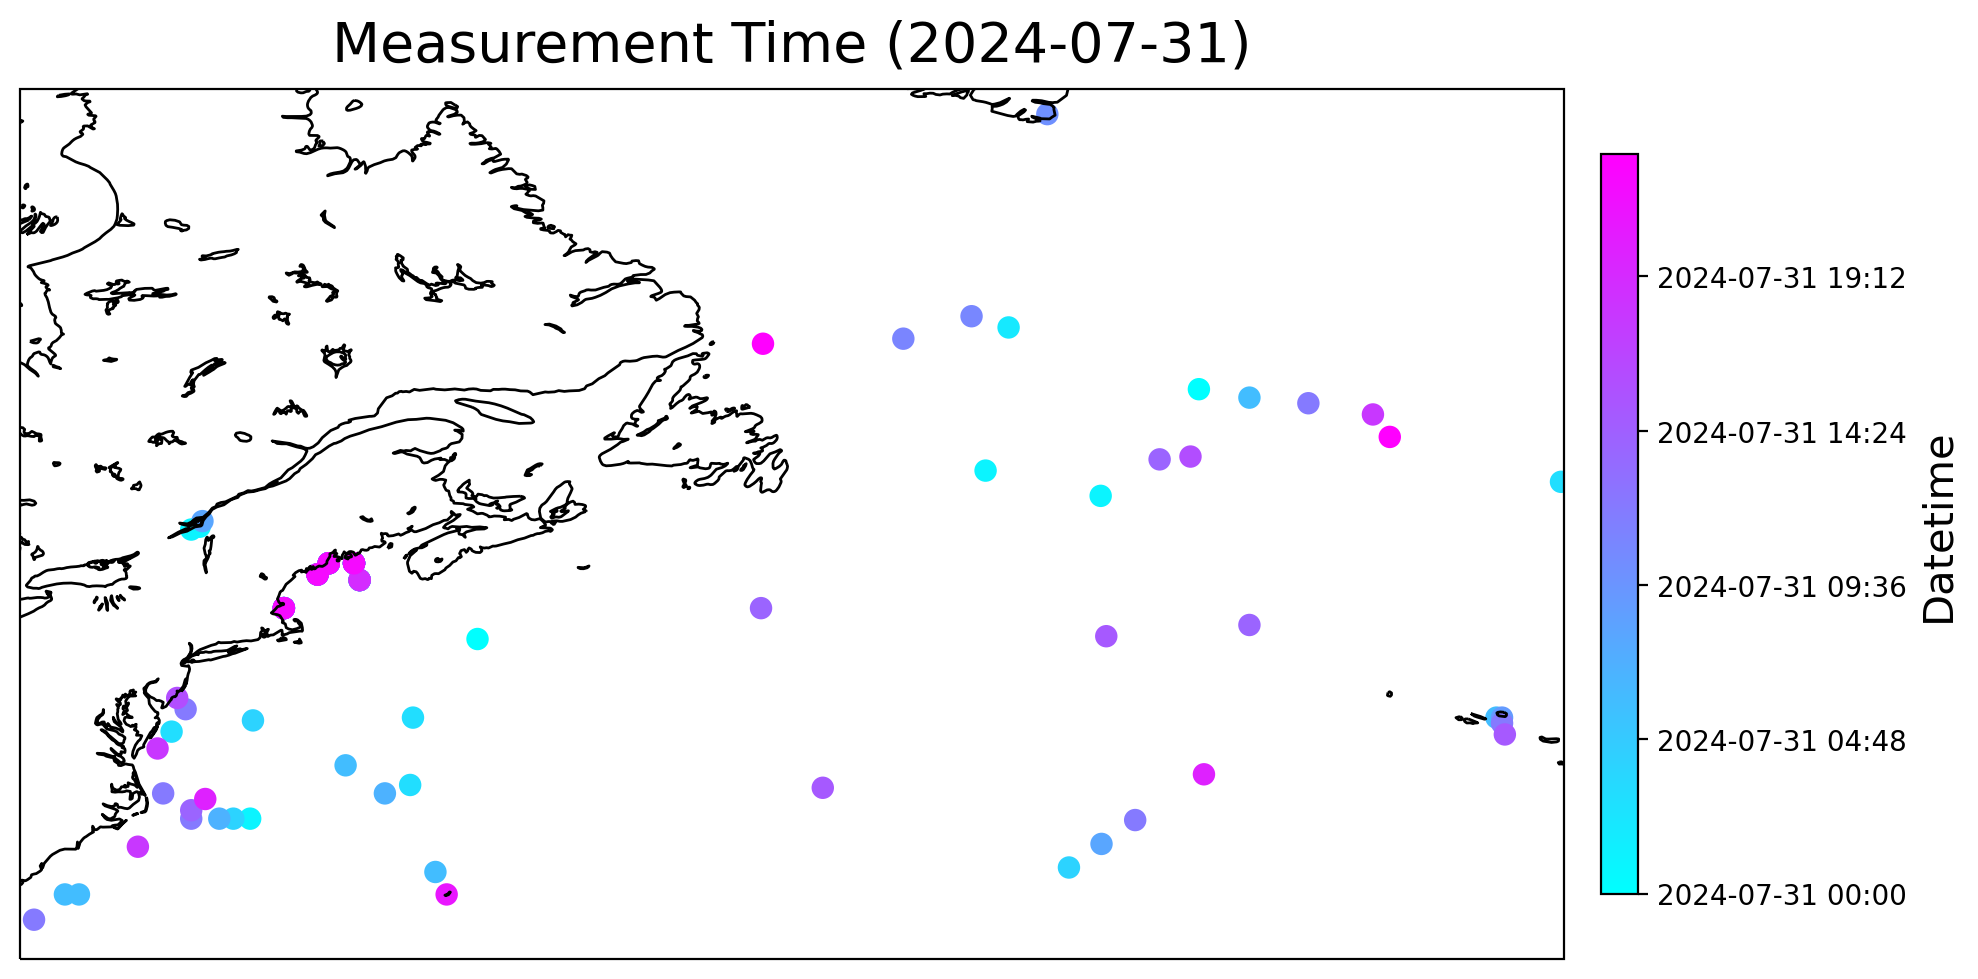

In [20]:
import matplotlib.dates as mdates

#--- Northern Atlantic
latitude_north = 61
latitude_south = 30
longitude_west = -80
longitude_east = -25

projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

time_values = filtered_non_null_ds['obs'].values
time_numeric = mdates.date2num(time_values)  # Convert to matplotlib date format

# Scatter plot with color mapped to time values
c = ax.scatter(
    filtered_non_null_ds['lon'].values,
    filtered_non_null_ds['lat'].values,
    c=time_numeric,
    s=50,
    cmap='cool',  # You can change the colormap as needed
    transform=ccrs.PlateCarree()
)

# Create colorbar and set its label to datetime format
clb = plt.colorbar(c, shrink=0.4, pad=0.02, ax=ax)
clb.set_label('Datetime', fontsize=15)

date_formatter = mdates.DateFormatter('%Y-%m-%d %H:%M')
clb.ax.yaxis.set_major_formatter(date_formatter)

ax.set_title("Measurement Time ("+date+")", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.LAKES, zorder=100, edgecolor='black', facecolor='none')
ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

fig.set_dpi(200)
#fig.savefig(location_title, dpi=200, bbox_inches='tight')
fig.show()